In [2]:
# Создаем соединение c базой данных (Для того, чтобы определить данные для подключения с базой данных 
# необходимо зайти в Posgresql, после введения пользовательского пароля, кликаем "Servers", 
# затем кликаем правой кнопкой мыши, в сплывающем окне выбираем "Properties", переходим в раздел "Connection".
# В этом разделе отображены все данные, необходимые для соединения с базой данных. 

import psycopg2 # драйвер для postgresql
import getpass  # эта функция скрывает пароль, можно не вводить данную функцию, 
# тогда в строке password вам необходимо указать свой пароль от базы данных 

conn=psycopg2.connect(user='postgres',
                      database='postgres',
                      host='localhost',
                      port='5433',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())


Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5433', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [4]:
import pandas as pd


# Запрос, который выводит таблицу с рейтингом и типом рейтинга при условии, что используется школа агенства Эксперт РА 
# В строке \"DATE\" >=  AND \"DATE\" <=   пользователь может задать любой необходимый промежуток времени


query = """SELECT rating_task1.\"GRADE\", rating_task1.\"RAT_TYPE\"
FROM rating_task1 
WHERE "AGENCY_ID" = 'EXP'
AND \"DATE\" >= '2014/01/01' AND \"DATE\" <= '2015/01/01' 
AND \"CHANGE\" != 'снят' AND \"CHANGE\" != 'приостановлен'"""

ratings=pd.read_sql_query(query, conn)
ratings


,GRADE,RAT_TYPE
0,A+,FS&R
1,B+,Cr&D
2,B++,Cr&D
3,A++,FS&R
4,A,Cr&D
...,...,...
836,A,Cr&D
837,A+,FS&R
838,A,Cr&D
839,A+,R&QS


In [5]:
# Запрос, который выводит таблицу из базы данных 


query1 = """SELECT * 
FROM public."scale_EXP_task1" 
WHERE \"GRADE\" != 'Снят' AND \"GRADE\" != 'Приостановлен'"""

rat=pd.read_sql_query(query1, conn)
rat

,GRADE,GRADE_ID
0,A++,0
1,A+,1
2,A,2
3,B++,3
4,B+,4
5,B,5
6,C++,6
7,C+,7
8,C,8
9,D,9


In [6]:
# Перевод текстового значения 'GRADE_ID' в числовое 

rat['GRADE_ID'] = rat['GRADE_ID'].astype(int)

# Объединение таблиц 

x = pd.merge(rat, ratings, how='inner', on=['GRADE'])
x

# # С помощью функции pivot создается таблица, в которой отображается количество компаний, 
# # допустивших и недопустивших дефолт на заданном промежутке времени, которые, в свою очередь, сгруппированны по grade

ratings1 = x[['GRADE_ID', 'RAT_TYPE']]
ratings1['def'] = ratings1['RAT_TYPE']
ratings1['def'] = ratings1['def'].replace(to_replace = {'Cr&D': 'default', 'FS&R': 'non-default', 'R&QS': 'non-default'})
ratings1 = ratings1.pivot_table(index = 'GRADE_ID', columns = 'def', aggfunc = 'count')
ratings1 = ratings1.replace(to_replace = {float('nan'): 0})
ratings1

RAT_TYPE            
def       default non-default
GRADE_ID                     
0            13.0        71.0
1           103.0        75.0
2           304.0        91.0
3            79.0        16.0
4            12.0         5.0
5             3.0         3.0
6             3.0         1.0
7             6.0         2.0
8             4.0         0.0
10           11.0         1.0

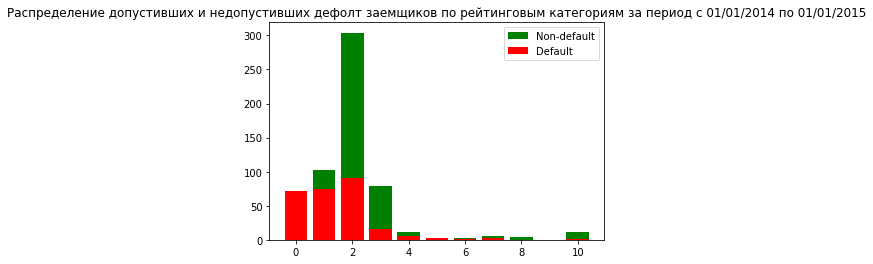

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Создание графика вида bar с заданными цветами для разных групп, для допустивших дефолт - красный, для недопустивших дефолт - зеленый

plt.bar(ratings1.index.values, ratings1['RAT_TYPE']['default'].values, label = 'Non-default', color = 'g')
plt.bar(ratings1.index.values, ratings1['RAT_TYPE']['non-default'].values,  label = 'Default', color = 'r')

# Добавление легенды
plt.legend()

# Добавление заголовка 
plt.title('Распределение допустивших и недопустивших дефолт заемщиков по рейтинговым категориям за период с 01/01/2014 по 01/01/2015')

plt.show()

plt.savefig('Распределение допустивших и недопустивших дефолт заемщиков по рейтинговым категориям.png')

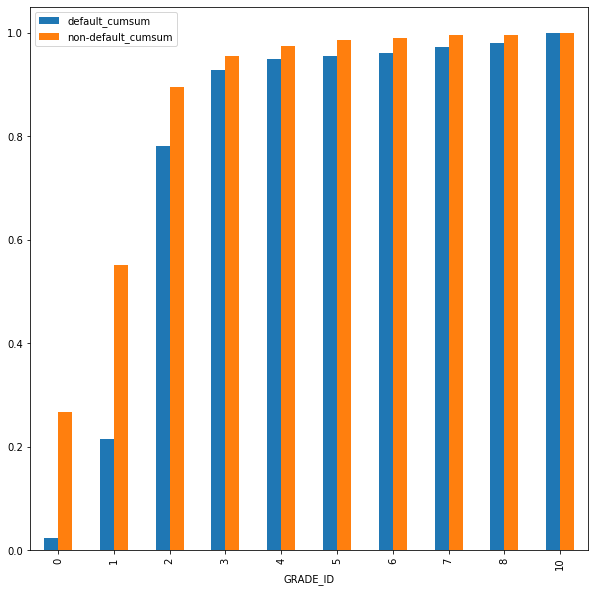

In [65]:
# Эмпирические функции распределения недефолтеров и дефолтеров по рейтинговым категориям

import pandas as pd

# Формирование таблицы из индексов
ratings2 = pd.DataFrame(index = ratings1.index)

# Присвоение колонке с индексом 0 имени 'non-default'], присвоение колонке с индексом 1 имени 'default']

ratings2['non-default'] = ratings1['RAT_TYPE'][0]

ratings2['default'] = ratings1['RAT_TYPE'][1]

# Вычисление частоты распределения по категории 'default' и 'non-default'

ratings2['default_cumsum'] = ratings2['default'].cumsum()/ratings2['default'].sum()

ratings2['non-default_cumsum'] = ratings2['non-default'].cumsum()/ratings2['non-default'].sum()

ratings3 = ratings2[['default_cumsum', 'non-default_cumsum']]

ratings3.plot(kind = 'bar', figsize = [10,10], fontsize = 10)

plt.show()

plt.savefig('Распределение недефолтеров и дефолтеров.png')

In [10]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install weasyprint

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade pip setuptools

Requirement already up-to-date: pip in /opt/anaconda3/lib/python3.7/site-packages (19.3.1)
Requirement already up-to-date: setuptools in /opt/anaconda3/lib/python3.7/site-packages (42.0.2)
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Для Mac os GTK устанавливается следующим образом: 
# необходимо открыть Терминал и ввести там: ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" < /dev/null 2> /dev/null
# после чего потребуется ввести пароль пользователя Mac 
# после ввода пароля необходимо ввести: brew install gtk+
# Затем требуется перезапустить Jupyter notebook 

In [ ]:
# Формируем отчет 